In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_excel("HousePricePrediction.xlsx")
dataset.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [21]:
#dataset['OverallCond'].dtypes

dtype('int64')

In [4]:
dataset.shape

(2919, 13)

# Data Preprocessing

In [5]:
# categorize the features

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical Variables:",len(object_cols))

integer = (dataset.dtypes == 'int64')
num_cols = list(integer[integer].index)
print("Integer Variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float Variables:",len(fl_cols))

Categorical Variables: 4
Integer Variables: 6
Float Variables: 3


# Exploratory Data Analysis

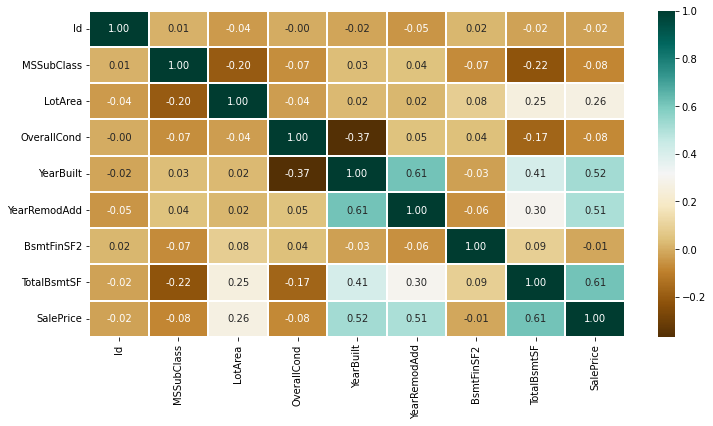

In [6]:

numerical_dataset = dataset.select_dtypes(include=['number'])
plt.figure(figsize = (12,6))
sns.heatmap(numerical_dataset.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)
plt.show()

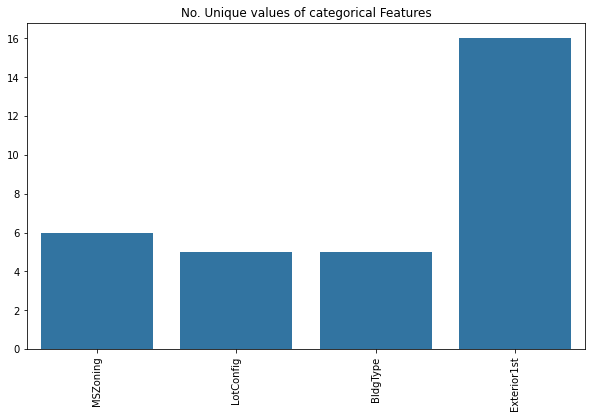

In [7]:
# analyzing categorical features using barplot

unique_values =[]

for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title("No. Unique values of categorical Features")
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y = unique_values)
plt.show()

From the above bar chart we can see Exterior1St has around 16 unique categories and other features have around 6 unique categories. To findout actual count, we can plot bargraph of each foru features.

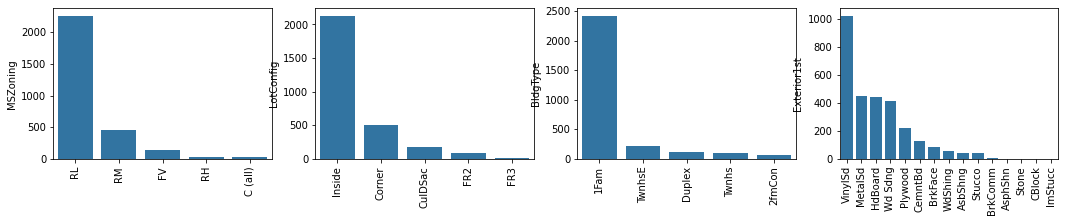

In [8]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index=1

for col in object_cols:
    y=dataset[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index +=1

# Data Cleaning

In [9]:
# deleting ID column as it will not be participating in any prediction

dataset.drop(['Id'],axis = 1,inplace = True)


In [10]:
dataset.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [12]:
# now, replace null values in SalesPrice column with their mean values.

dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [13]:
dataset.isnull().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

As above we can see there are still some null values present in some columns. So we will simply delete those records as they are very less.

In [14]:
new_dataset = dataset.dropna()

In [16]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

Now I will convert(label) categorical features into int form, as this is regression problem (using OneHotEncoder)

In [20]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
obj_cols = list(s[s].index)
print("Categorical variables:")
print(obj_cols)
print("No. of categorical features:",len(obj_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of categorical features: 4


In [24]:
OH_encoder = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore')
OH_cols= pd.DataFrame(OH_encoder.fit_transform(new_dataset[obj_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(obj_cols,axis=1)
df_final= pd.concat([df_final,OH_cols],axis = 1)
df_final.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Splitting dataset into Training and Testing dataset

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'],axis = 1)
Y = df_final['SalePrice']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

# Model training and accuracy

As we have to train model to determine continuous values, I will be using SVM,Random Forest Regressor,Linear Regressor

In [39]:
# SVM - support vector Machine

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(x_train,y_train)
y_pred_svm = model_SVR.predict(x_test)

print(mean_absolute_percentage_error(y_test,y_pred))

0.1874168384159986


In [36]:
# Ramdom Forest Regression

from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_train,y_train)
y_pred = model_RFR.predict(x_test)

mean_absolute_percentage_error(y_test,y_pred)

0.18892659688088806

In [38]:
# Linear Regressing

from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(x_train,y_train)
y_pred = model_LR.predict(x_test)

mean_absolute_percentage_error(y_test,y_pred)

0.1874168384159986

As we can see SVM & Linear model is giving better accuracy  than Random Forest Regression.As absolute mean error is less that Random forest regresssion.